#Load Dataset

In [32]:
import pandas as pd

file_path = "/content/drive/MyDrive/column_2C_weka.csv"

df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())


First few rows of the dataset:
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column               

#Import libraries

In [67]:
import numpy as np
import random
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Initialize weights and bias as 0

In [34]:
def weightInitialization(n_features):
    w = np.zeros((n_features, 1))
    b = 0
    return w, b


#Sigmoid Function

In [35]:
def sigmoid_activation(z):
    y = 1 / (1 + np.exp(-z))
    return y


#Model Optimization Function

In [36]:
def model_optimize(w, b, X, Y):
    m = X.shape[1]
    Z = np.dot(w.T, X) + b
    A = sigmoid_activation(Z)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    dz = A - Y
    dw = 1/m * np.dot(X, dz.T)
    db = 1/m * np.sum(dz)
    grads = {"dw": dw, "db": db}
    return grads, cost


#Model Optimization

In [37]:
def model_fit(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 10 == 0:
            costs.append(cost)
    parameters = {"w": w, "b": b}
    return parameters, costs


In [39]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)


#Use logistic regression for dataset

In [41]:
#Split the data into training and testing sets (70:30 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)

Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

Y_train = np.array(Y_train, dtype=float)
Y_test = np.array(Y_test, dtype=float)

#Initialize weights and bias
n_features = X_train.shape[1]
w_init, b_init = weightInitialization(n_features)

learning_rate = 0.01
epochs = 1000

#Train the model
parameters, costs = model_fit(w_init, b_init, X_train.T, Y_train.T, learning_rate, epochs)

#Retrieve the optimized weights and bias
w_optimized = parameters["w"]
b_optimized = parameters["b"]

#Make predictions on the test set
Z_test = np.dot(w_optimized.T, X_test.T) + b_optimized
A_test = sigmoid_activation(Z_test)
predictions = (A_test > 0.5).astype(float)  # Convert probabilities to binary predictions (0 or 1)

#Calculate the accuracy score
accuracy = accuracy_score(Y_test, predictions.T)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 77.42%


<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-35-a7836800c18b>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-z))


#Plot the cost for each epoch

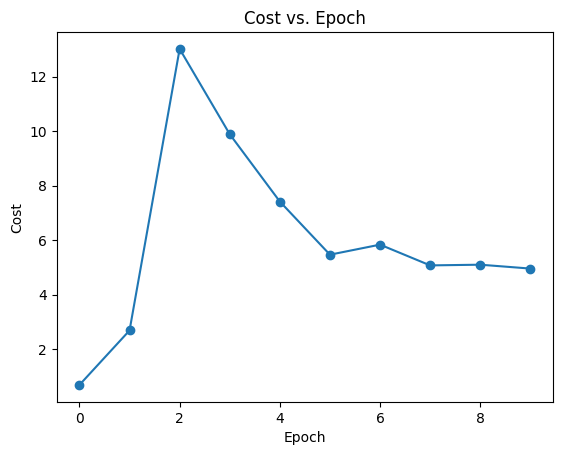

In [44]:
plt.plot(range(len(costs)), costs, marker='o', linestyle='-')
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

#Smaller portion of training data

In [46]:
percentage_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for percentage in percentage_list:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=(1 - percentage), random_state=42)

    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    Y_train = np.array(Y_train, dtype=float)
    Y_test = np.array(Y_test, dtype=float)

    parameters, _ = model_fit(w_init, b_init, X_train.T, Y_train.T, learning_rate, epochs)

    w_optimized = parameters["w"]
    b_optimized = parameters["b"]

    Z_test = np.dot(w_optimized.T, X_test.T) + b_optimized
    A_test = sigmoid_activation(Z_test)
    predictions = (A_test > 0.5).astype(float)

    accuracy = accuracy_score(Y_test, predictions.T)
    print("Accuracy with {}% of training data: {:.2%}".format(int(percentage * 100), accuracy))

<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


Accuracy with 10% of training data: 78.14%
Accuracy with 20% of training data: 75.00%


<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


Accuracy with 30% of training data: 76.50%
Accuracy with 40% of training data: 79.03%


<ipython-input-35-a7836800c18b>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-z))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-35-a7836800c18b>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-z))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-35-a7836800c18b>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-z))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered 

Accuracy with 50% of training data: 78.71%
Accuracy with 60% of training data: 77.42%
Accuracy with 70% of training data: 76.60%
Accuracy with 80% of training data: 80.65%


<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-35-a7836800c18b>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-z))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-36-9b8cb877c189>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-35-a7836800c18b>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-z))


Accuracy with 90% of training data: 80.65%


#L1 L2 Regularization

In [59]:
def model_optimize(w, b, X, Y, reg=None, lambda_val=0.1):
    m = X.shape[1]

    #Get the Prediction
    Z = np.dot(w.T, X) + b
    A = sigmoid_activation(Z)

    #Find the cost/loss
    cross_entropy_loss = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    #Regularization term
    if reg == "L1":
        regularization_term = (lambda_val / (2 * m)) * np.sum(np.abs(w))
    elif reg == "L2":
        regularization_term = (lambda_val / (2 * m)) * np.sum(w ** 2)
    else:
        regularization_term = 0

    cost = cross_entropy_loss + regularization_term

    #Calculate the gradients
    dz = A - Y
    dw = 1/m * np.dot(X, dz.T) + (lambda_val / m) * np.sign(w) if reg == "L1" else (lambda_val / m) * w
    db = 1/m * np.sum(dz)

    grads = {"dw": dw, "db": db}

    return grads, cost


#Accuracy change with regularization

In [61]:
epochs_list = [100, 500, 1000]
reg_types = [None, "L1", "L2"]
lambda_values = [0.01, 0.1, 1.0]

results_df = pd.DataFrame(columns=["Epochs", "Regularization Type", "Lambda", "Test Accuracy"])

for epochs in epochs_list:
    for reg_type in reg_types:
        for lambda_val in lambda_values:

            n_features = X_train.shape[1]
            w_init, b_init = weightInitialization(n_features)

            parameters, _ = model_fit(w_init, b_init, X_train.T, Y_train.T, learning_rate=0.01, no_iterations=epochs)

            w_optimized = parameters["w"]
            b_optimized = parameters["b"]

            Z_test = np.dot(w_optimized.T, X_test.T) + b_optimized
            A_test = sigmoid_activation(Z_test)
            predictions = (A_test > 0.5).astype(float)

            accuracy = accuracy_score(Y_test, predictions.T)

            results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)

print(results_df)

<ipython-input-61-28abc3c52f61>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)
<ipython-input-61-28abc3c52f61>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)
<ipython-input-61-28abc3c52f61>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)
<ipython-input-61-28abc3c52f61>

    Epochs Regularization Type  Lambda  Test Accuracy
0    100.0                 NaN    0.01       0.741935
1    100.0                 NaN    0.10       0.741935
2    100.0                 NaN    1.00       0.741935
3    100.0                  L1    0.01       0.741935
4    100.0                  L1    0.10       0.741935
5    100.0                  L1    1.00       0.741935
6    100.0                  L2    0.01       0.741935
7    100.0                  L2    0.10       0.741935
8    100.0                  L2    1.00       0.741935
9    500.0                 NaN    0.01       0.741935
10   500.0                 NaN    0.10       0.741935
11   500.0                 NaN    1.00       0.741935
12   500.0                  L1    0.01       0.741935
13   500.0                  L1    0.10       0.741935
14   500.0                  L1    1.00       0.741935
15   500.0                  L2    0.01       0.741935
16   500.0                  L2    0.10       0.741935
17   500.0                  

<ipython-input-61-28abc3c52f61>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)
<ipython-input-61-28abc3c52f61>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)
<ipython-input-61-28abc3c52f61>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Epochs": epochs, "Regularization Type": reg_type, "Lambda": lambda_val, "Test Accuracy": accuracy}, ignore_index=True)


#Logistic Regression Class from sklearn library

In [66]:
logreg_model = LogisticRegression()

logreg_model.fit(X_train, Y_train)

predictions = logreg_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy using Logistic Regression from sklearn: {:.2%}".format(accuracy))

Accuracy using Logistic Regression from sklearn: 87.10%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Decision Trees from sklearn library

In [69]:
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, Y_train)

predictions = decision_tree_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy using Decision Tree from sklearn: {:.2%}".format(accuracy))

Accuracy using Decision Tree from sklearn: 83.87%
